# 1. LUT
- 비선형 변환
- 고속 변환(for 문으로 계산하지 않음)

In [1]:
import cv2
import numpy as np
import subprocess as sp
from matplotlib import pyplot as plt

In [2]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
    plt.show()

In [3]:
table = np.array([255-i for i in range(256)])
print(table)
# 테이블을 내가 만들어서 원본에 적용해서 바꾸는 법

[255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238
 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220
 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202
 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184
 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148
 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130
 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112
 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95  94
  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76
  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58
  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42  41  40
  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22
  21  20  19  18  17  16  15  14  13  12  11  10   

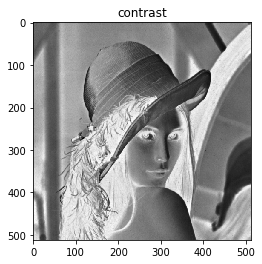

In [4]:
img1 = cv2.imread('lenna.bmp', 0)
out = cv2.LUT(img1, table)  # 반전효과
imshow('contrast', out)


# LUT 함수의 내부 원리
# dst = img.copy()
# for r in range(img.shape[0]):
#     for c in range(img.shape[1]):
#         dst[r,c] = table[  img1[r,c]  ]  # 0 -> 255, 1 -> 254 ,,,


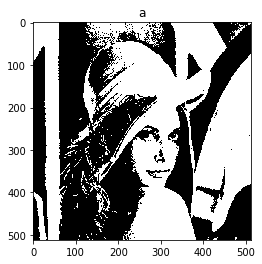

In [5]:
# threshold LUT
# 두가지 방법

table = np.array([ i > 127 for i in range(256)]) * 255
# print(table)

table = np.array([ 255 if i > 127 else 0 for i in range(256)])
# print(table)

out = cv2.LUT(img1, table)
imshow("a", out)

# 2. 감마 보정
- 전체적인 밝기를 키우는 법

In [6]:
p = 0.7                # 원본 값을 255로 나눈 후
gamma = 0.5            # sqrt(0.7)
print(p, p ** gamma)
                       # gamma < 1 밝아짐
    
gamma = 1            
print(p, p ** gamma)   # gamma = 1 그대로 출력


gamma = 2            
print(p, p ** gamma)   # gamma > 1 어두워짐   

                       # 입력 영상 = x / 출력 영상 = y

0.7 0.8366600265340756
0.7 0.7
0.7 0.48999999999999994


[  0  15  22  27  31  35  39  42  45  47  50  52  55  57  59  61  63  65
  67  69  71  73  74  76  78  79  81  82  84  85  87  88  90  91  93  94
  95  97  98  99 100 102 103 104 105 107 108 109 110 111 112 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 141 142 143 144 145 146 147 148 148 149 150
 151 152 153 153 154 155 156 157 158 158 159 160 161 162 162 163 164 165
 165 166 167 168 168 169 170 171 171 172 173 174 174 175 176 177 177 178
 179 179 180 181 182 182 183 184 184 185 186 186 187 188 188 189 190 190
 191 192 192 193 194 194 195 196 196 197 198 198 199 200 200 201 201 202
 203 203 204 205 205 206 206 207 208 208 209 210 210 211 211 212 213 213
 214 214 215 216 216 217 217 218 218 219 220 220 221 221 222 222 223 224
 224 225 225 226 226 227 228 228 229 229 230 230 231 231 232 233 233 234
 234 235 235 236 236 237 237 238 238 239 240 240 241 241 242 242 243 243
 244 244 245 245 246 246 247 247 248 248 249 249 25

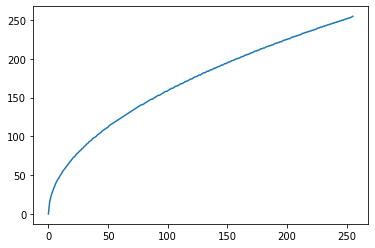

In [7]:
gamma = 0.5
table = np.array([((i / 255.0) ** gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
print(table)
print(plt.plot(table))  # gamma가 0.7 일때

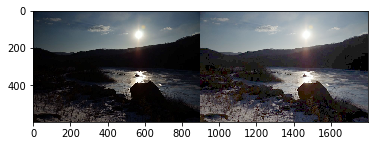

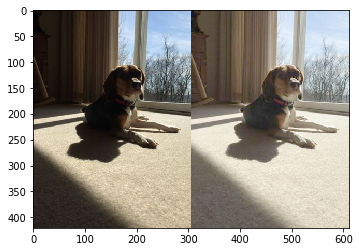

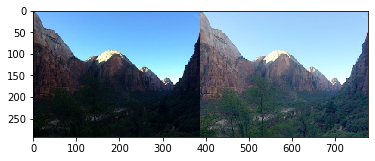

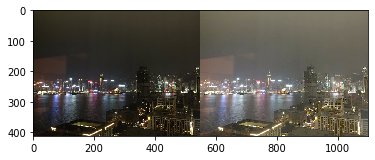

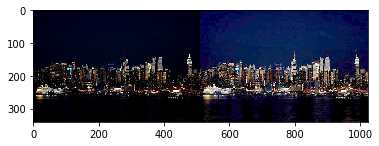

In [8]:
files = ['gamma1.jpg', 'gamma2.jpg', 'gamma3.jpg', 'caption.jpg', 'night.jpg']
for f in files:
    img1 = cv2.imread(f)
    out = cv2.LUT(img1, table)
    imshow('', np.hstack((img1,out)))

# 히스토그램

(array([15329., 31338., 20358., 35131., 41844., 50762., 33318., 17554.,
        15859.,   651.]),
 array([ 25.,  47.,  69.,  91., 113., 135., 157., 179., 201., 223., 245.]),
 <a list of 10 Patch objects>)

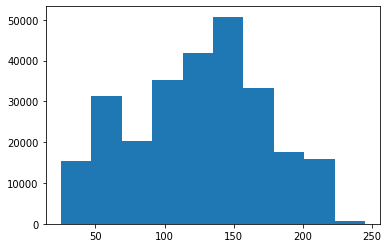

In [20]:
img = cv2.imread('lenna.bmp', 0)

plt.hist( img.flatten() )  # 히스토그램은 1차원으로 쫙 펴줘야함

(256, 1)


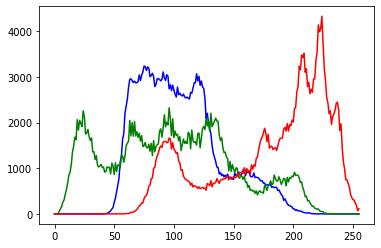

In [21]:
img1 = cv2.imread('lenna.bmp')

hist_b = cv2.calcHist([img1], [0], None, [256], [0,256])
hist_g = cv2.calcHist([img1], [1], None, [256], [0,256])
hist_r = cv2.calcHist([img1], [2], None, [256], [0,256])
print(hist_b.shape)
# print(hist_b)

plt.plot(hist_b, "b")
plt.plot(hist_g, "g")
plt.plot(hist_r, "r")


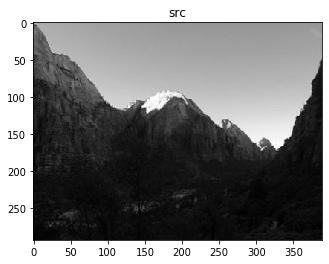

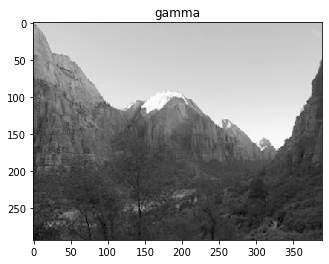

In [22]:
img1 = cv2.imread('gamma3.jpg', 0)
gamma = 0.5
table = np.array([((i / 255.0) ** gamma)*255 for i in np.arange(0, 256)]).astype('uint8')

out = cv2.LUT(img1, table)

imshow("src", img1)
imshow("gamma", out)


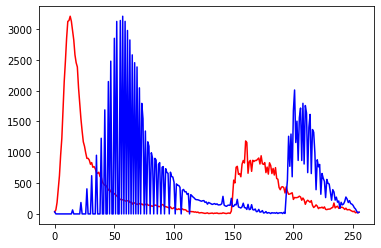

In [23]:
hist_1 = cv2.calcHist([img1], [0], None, [256], [0,256])
hist_2 = cv2.calcHist([out], [0], None, [256], [0,256])

plt.plot(hist_1, 'r')
plt.plot(hist_2, 'b')

# 전체적으로 밝아진 것은 알 수 있음.
# 빈도수가 커짐 -> 밝아진 것이 많음.
# 이미지의 특성을 파악할 수 있는 가장 기본적인 방법 중 하나 -> 히스토그램

# 3. 영상 스트레칭

In [24]:
src1 = cv2.imread('lenna.bmp', 0)
gmin = float(np.min(src1))
gmax = float(np.max(src1))

print(gmin, gmax)

25.0 245.0


0.0 255.0


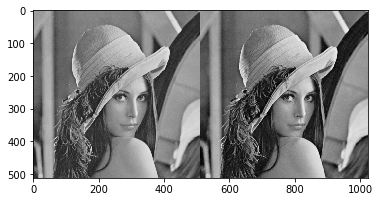

In [25]:
dst1 = ((src1 - gmin) * 255. / (gmax - gmin)).astype(np.uint8)  # 정규화하기, 히스토그램 스트레칭

gmin = float(np.min(dst1))
gmax = float(np.max(dst1))

print(gmin, gmax)

# 최솟값은 0, 최댓값은 255로 스트레칭 됨.

imshow("", np.hstack((src1, dst1)))

# 4. equalizeHist

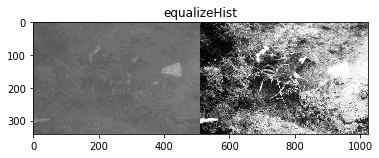

In [27]:
src = cv2.imread('crayfish.jpg', 0)
dst = cv2.equalizeHist(src)
imshow('equalizeHist', np.hstack((src,dst)))

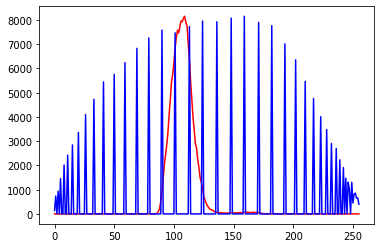

In [28]:
hist_1 = cv2.calcHist([src], [0], None, [256], [0,256])
hist_2 = cv2.calcHist([dst], [0], None, [256], [0,256])

plt.plot(hist_1, 'r')
plt.plot(hist_2, 'b')
# 많이 변했다. 엄청 넓어짐 -> 대비효과가 커질 것임.

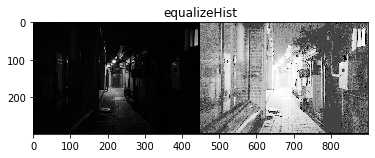

In [29]:
src = cv2.imread('night2.jpg', 0)
dst = cv2.equalizeHist(src)
imshow('equalizeHist', np.hstack((src,dst)))

# 영상 합성

In [9]:
img1 = cv2.imread('test1.jpg')
img2 = cv2.imread('test2.jpg')

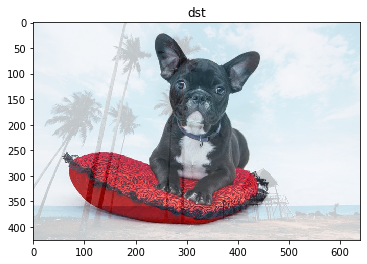

In [11]:
alpha = 0.2
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0.0)

imshow('dst', dst)

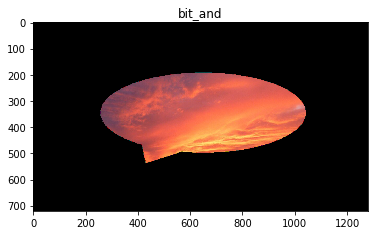

In [12]:
img1 = cv2.imread('sun.jpg')
img2 = cv2.imread('poong.png')

img2 = cv2.resize(img2, dsize=(img1.shape[1], img1.shape[0]))
# 영상에서는 컬럼이 먼저, 행이 나중 (폭이 먼저, 높이가 다음)

bit_and = cv2.bitwise_and(img1, img2)

imshow('bit_and', bit_and)

# 로고 넣기

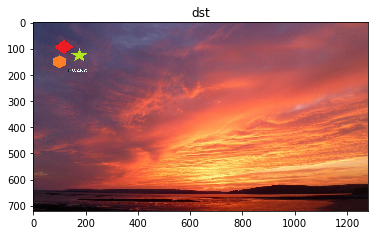

In [13]:
img1 = cv2.imread('sun.jpg')
img2 = cv2.imread('logo.png')

img2 = cv2.resize(img2, dsize=(320, 240))

for r in range(img2.shape[0]):
    for c in range(img2.shape[1]):
        if np.mean(img2[r,c,:]) > 20:
            img1[r,c,:] = img2[r,c,:]
               
imshow('dst', img1)

(240, 320, 3)
(240, 320, 3)


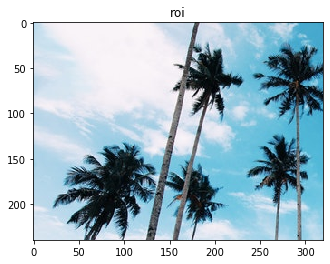

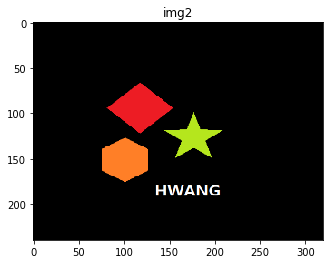

In [14]:
img1 = cv2.imread('test1.jpg')
img2 = cv2.imread('logo.png')
img2 = cv2.resize(img2, dsize=(320, 240))

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]  # 영상처리가 필요한 부분, 우리가 관심있는 부분을 roi 라고 함
print(roi.shape)
print(img2.shape)
imshow('roi', roi)
imshow('img2',img2)

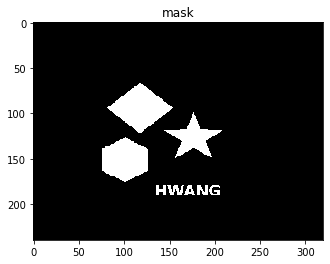

In [15]:
# 원하는 부분 흰색으로 -> 로고 이미지 딸려고
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 50, 255, cv2.THRESH_BINARY)
imshow('mask', mask)

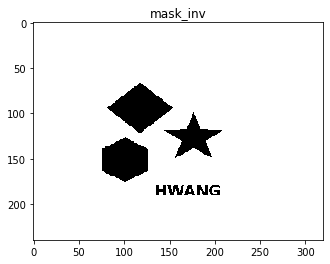

In [16]:
# 흰색 영역 추출 -> 배경을 투명하게 만들려고
mask_inv = cv2.bitwise_not(mask) 
imshow('mask_inv',mask_inv)

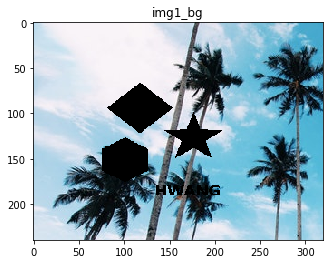

In [17]:
# 배경과
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
imshow('img1_bg',img1_bg)

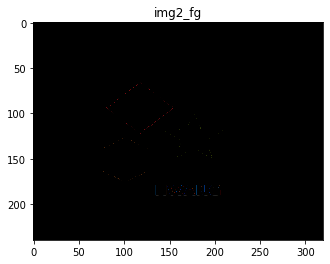

In [18]:
# 로고 이미지에서 전경 부분만 뽑음
# 자기와 자기 연산을 비트(and)연산하는데, mask는 
img2_fg = cv2.bitwise_and(img2,img2,mask = mask_inv)
imshow('img2_fg',img2_fg)

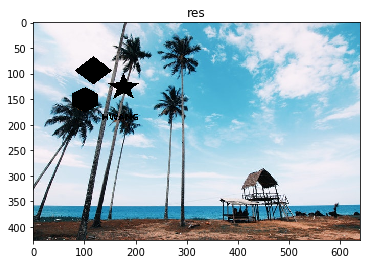

In [19]:
# 두개의 영상을 그냥 산술적으로 더함
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst  # 계산된 이미지를 왼쪽 위에 위치시킴
imshow('res',img1)